In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from tensorflow.examples.tutorials.mnist import input_data

In [2]:
mnist = input_data.read_data_sets('/tmp/data', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


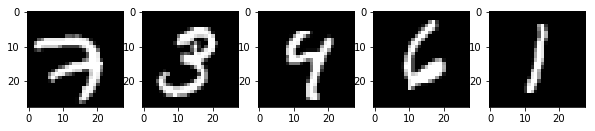

In [3]:
plt.figure(figsize=(10,10))

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(np.reshape(mnist.train.images[i], (28,28)), cmap='gray')
    
plt.show()

# Estruturando a Rede Neural

In [4]:
num_input = 784
num_hidden1 = 256
num_hidden2 = 128

In [5]:
x = tf.placeholder(tf.float32, [None, num_input])

In [6]:
# Weights 

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input,num_hidden1]),dtype=tf.float32),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden1, num_hidden2]), dtype=tf.float32),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden2, num_hidden1]), dtype=tf.float32),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden1, num_input]), dtype=tf.float32)
}

In [7]:
# Bias

bias = {
    'encoder_h1': tf.Variable(tf.random_normal([num_hidden1]), dtype=tf.float32),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden2]), dtype=tf.float32),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden1]), dtype=tf.float32),
    'decoder_h2': tf.Variable(tf.random_normal([num_input]), dtype=tf.float32)
}

In [8]:
# Encoder

def encoder(x):

    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']), bias['encoder_h1']))
    
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']), bias['encoder_h2']))
    
    return layer_2

In [9]:
# Decoder

def decoder(x):
    
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']), bias['decoder_h1']))
    
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']), bias['decoder_h2']))
    
    return layer_2

In [10]:
# Model

encoder_nn = encoder(x) 
decoder_nn = decoder(encoder_nn)

In [11]:
# Prediction
y_pred = decoder_nn

In [12]:
# Target
y_true = x

In [13]:
learning_rate = 0.01

loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
opt = tf.train.AdamOptimizer(learning_rate).minimize(loss)

In [14]:
# Iniciar variáveis globais

init = tf.global_variables_initializer()

# Treinamento da rede neural

Epoch: 1000, Loss: 0.062916
Epoch: 2000, Loss: 0.054566
Epoch: 3000, Loss: 0.053269
Epoch: 4000, Loss: 0.051199
Epoch: 5000, Loss: 0.048936
Epoch: 6000, Loss: 0.047859
Epoch: 7000, Loss: 0.046851
Epoch: 8000, Loss: 0.046600
Epoch: 9000, Loss: 0.046985
Epoch: 10000, Loss: 0.047877
Epoch: 11000, Loss: 0.044625
Epoch: 12000, Loss: 0.043895
Epoch: 13000, Loss: 0.043107
Epoch: 14000, Loss: 0.043480
Epoch: 15000, Loss: 0.042511
Epoch: 16000, Loss: 0.041360
Epoch: 17000, Loss: 0.044140
Epoch: 18000, Loss: 0.040506
Epoch: 19000, Loss: 0.041317
Epoch: 20000, Loss: 0.044164
Epoch: 21000, Loss: 0.042228
Epoch: 22000, Loss: 0.040369
Epoch: 23000, Loss: 0.040339
Epoch: 24000, Loss: 0.039418
Epoch: 25000, Loss: 0.039199
Epoch: 26000, Loss: 0.039380
Epoch: 27000, Loss: 0.038363
Epoch: 28000, Loss: 0.038628
Epoch: 29000, Loss: 0.035763
Epoch: 30000, Loss: 0.039866

Original Images


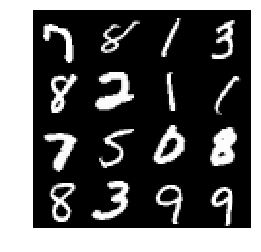

Reconstructed Images


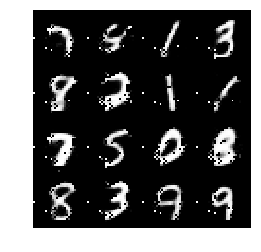

In [15]:
epochs = 30000
batch_size = 256

with tf.Session() as sess:
    
    sess.run(init)
    
    for i in range(1, epochs + 1):
        
        batch_x,_ = mnist.train.next_batch(batch_size)
        
        _,l = sess.run([opt, loss], feed_dict={x:batch_x})
        
        if i % 1000 == 0:
            
            print('Epoch: %i, Loss: %f' % (i, l))
            
    n = 4
    orig_imgs = np.zeros((28 * n,28 * n))
    rec_imgs = np.zeros((28 * n, 28 * n))
    
    for i in range(n):
        
        batch_x,_ = mnist.test.next_batch(n)
        
        g = sess.run(decoder_nn, feed_dict={x:batch_x})
            
        for j in range(n):
            
            orig_imgs[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = batch_x[j].reshape([28,28])
            
        for j in range(n):
            
            rec_imgs[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = g[j].reshape([28,28])
            
    print()
    
    print("Original Images")
    plt.figure(figsize=(n, n))
    plt.imshow(orig_imgs, origin="upper", cmap="gray")
    plt.axis('off')
    plt.show()

    print("Reconstructed Images")
    plt.figure(figsize=(n, n))
    plt.imshow(rec_imgs, origin="upper", cmap="gray")
    plt.axis('off')
    plt.show()